In [370]:
#import the necessory libraries
import pandas as pd
import numpy as np

#For Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#import plotly
import warnings
warnings.filterwarnings('ignore')


In [371]:
#Lets load the dataset
data=pd.read_csv("Car details v3.csv")
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [372]:
#Lets check the shape of the dataset
data.shape

(8128, 13)

So, Here we have 8128 Rows and 13 Columns...

In [373]:
#Lets check for isnull
data.isna().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

So , Here we have null  values in 5 Columns.. Lets see what we can do with nulls.

In [374]:
#Lets check the duplicated values
data.duplicated().sum()

1202

So, Here we have 1202 duplicates . Lets drop all the duplicated values Because this data is scraped from car24.com, So sellers try to put his car always in top of the page  so they can update daily in car24.com 

In [375]:
#Lets drop duplicates
data.drop_duplicates(inplace=True)

In [376]:
data.shape

(6926, 13)

So, Now we have 6926 columns. Lets move foreword to check datatypes

In [377]:
#Lets check the datatype of the dataset
data.dtypes

name              object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage           object
engine            object
max_power         object
torque            object
seats            float64
dtype: object

So, Here we have 9 Object Type columns , 9 Int type columns , and 1 float values

In [378]:
#Lets check the info of the datastet
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6926 entries, 0 to 8125
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6926 non-null   object 
 1   year           6926 non-null   int64  
 2   selling_price  6926 non-null   int64  
 3   km_driven      6926 non-null   int64  
 4   fuel           6926 non-null   object 
 5   seller_type    6926 non-null   object 
 6   transmission   6926 non-null   object 
 7   owner          6926 non-null   object 
 8   mileage        6718 non-null   object 
 9   engine         6718 non-null   object 
 10  max_power      6721 non-null   object 
 11  torque         6717 non-null   object 
 12  seats          6718 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 757.5+ KB


In [379]:
#Lets check statistical summary of the dataset
data.describe()

,year,selling_price,km_driven,seats
count,6926.000000,6.926000e+03,6.926000e+03,6718.000000
mean,2013.420300,5.172707e+05,7.399568e+04,5.434653
std,4.078286,5.197670e+05,5.835810e+04,0.984230
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.500000e+05,4.000000e+04,5.000000
50%,2014.000000,4.000000e+05,7.000000e+04,5.000000
75%,2017.000000,6.335000e+05,1.000000e+05,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


Observations


     Null value in seats
     Outliers in seats

In [380]:
#Lets describe the dataset with object columns
data.describe(include='O')

,name,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque
count,6926,6926,6926,6926,6926,6718,6718,6721,6717
unique,2058,4,3,2,5,393,121,322,441
top,Maruti Swift Dzire VDI,Diesel,Individual,Manual,First Owner,18.9 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm
freq,118,3755,6218,6342,4242,210,907,324,472


Observation 

    Null value in mileage, engine , max_power, torque

# EDA -> Exploratory Data Analysis


# Univariate Analysis

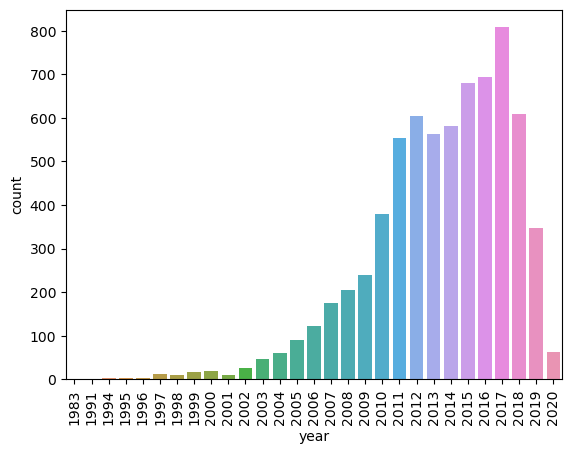

2017    808
2016    693
2015    681
2018    608
2012    604
2014    581
2013    562
2011    554
2010    380
2019    347
2009    240
2008    205
2007    176
2006    123
2005     91
2020     63
2004     60
2003     47
2002     26
2000     20
1999     17
1997     11
1998     10
2001      9
1996      3
1994      3
1995      2
1983      1
1991      1
Name: year, dtype: int64

In [43]:
#Lets plot year
sns.countplot(x='year',data=data)
plt.xticks(rotation=90)
plt.show()
data['year'].value_counts()

Here we can see that in 2017 most of the car sold.then 2016 and then 2015.

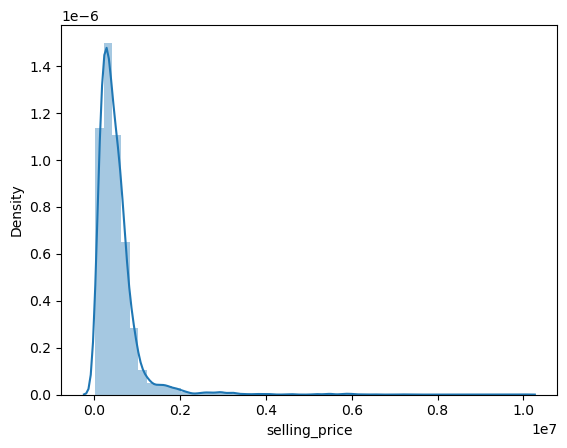

In [34]:
#Lets plot selling_price
sns.distplot(data['selling_price'])
plt.show()

So, here we can see that our selling_price in right skewed but we dont do any changes  beacuse its a Response Variable.

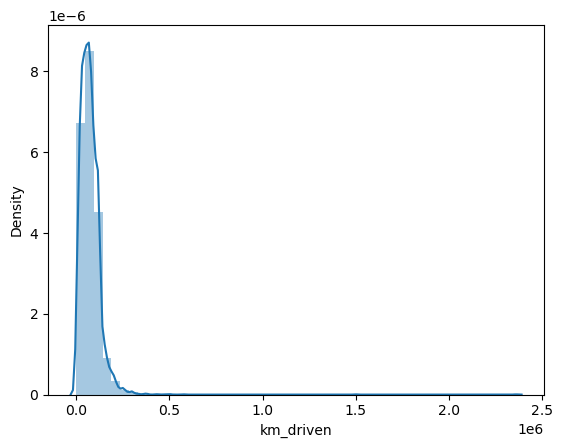

In [37]:
#Lets plot km_driven
sns.distplot(data['km_driven'])
plt.show()

Here we can see that our data is right skewed

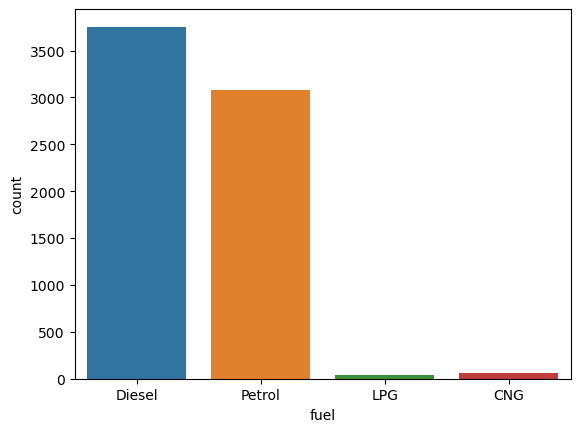

Diesel    3755
Petrol    3077
CNG         56
LPG         38
Name: fuel, dtype: int64

In [41]:
#Lets plot fuel
sns.countplot(x='fuel',data=data)
plt.show()
data['fuel'].value_counts()

So, Here we can see that most of the car is sold is a diesel car then Petrol and least in LPG then CNG

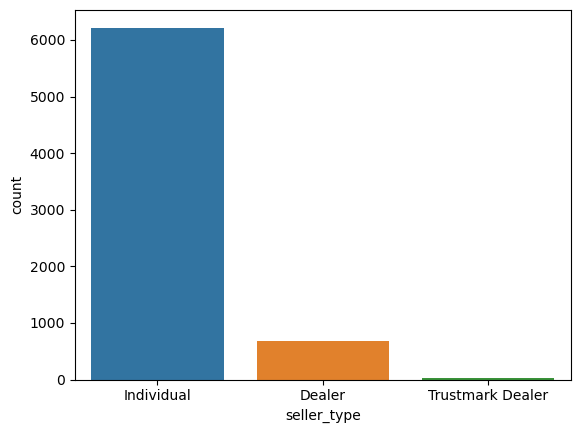

Individual          6218
Dealer               681
Trustmark Dealer      27
Name: seller_type, dtype: int64

In [42]:
#Lets plot seller_type
sns.countplot(x='seller_type',data=data)
plt.show()
data['seller_type'].value_counts()

Here, we can see that indivial most of the car sold. and then Dealer seller_type then trustmark dealer

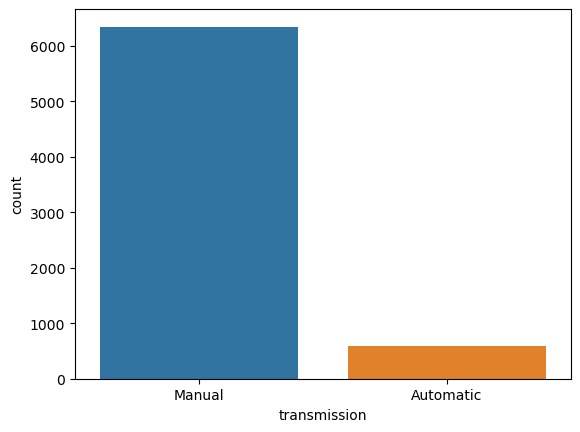

Manual       6342
Automatic     584
Name: transmission, dtype: int64

In [45]:
#Lets plot transmission
sns.countplot(x='transmission',data=data)
plt.show()
data['transmission'].value_counts()

Here we can see that maximum car sold is manual and less are Automatic

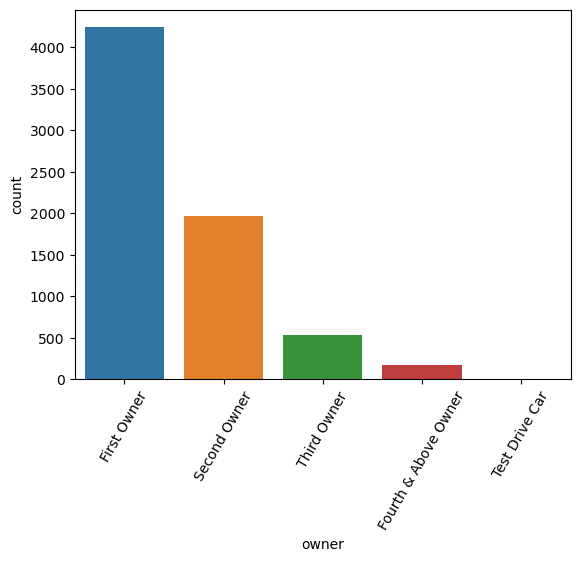

First Owner             4242
Second Owner            1974
Third Owner              536
Fourth & Above Owner     169
Test Drive Car             5
Name: owner, dtype: int64

In [50]:
#Lets plot owner
sns.countplot(x='owner',data=data)
plt.xticks(rotation=60)
plt.show()
data['owner'].value_counts()

Here we can see that most of the car is sold by first owner and then second and then third ...

Least are Fourth and above car and then Test Drive Car

In [381]:
#Lets conver mileage in int 
# Let's replace "," sign by empty space
data['mileage'] = data['mileage'].str.replace('kmpl','')


In [382]:
data['mileage'] = data['mileage'].str.replace('km/kg','')

In [383]:
data['mileage'] = data['mileage'].astype(float)

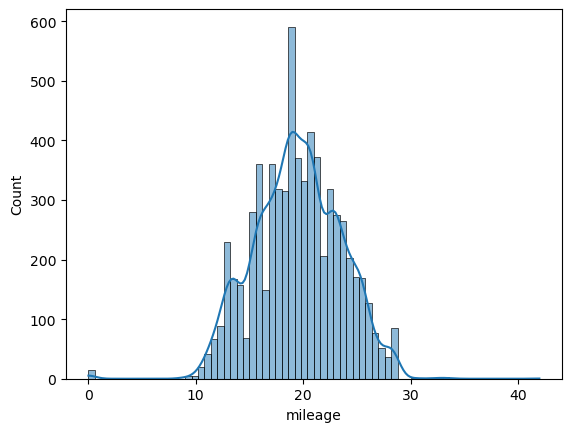

In [80]:
#Lets plot mileage
sns.histplot(data['mileage'],kde=True)
plt.show()

Not a Normal Distributed . Contain Some outliers.  

In [384]:
#Lets convert Engine in int 
# Let's replace "," sign by empty space
data['engine'] = data['engine'].str.replace('CC','')
data['engine'] = data['engine'].astype(float)

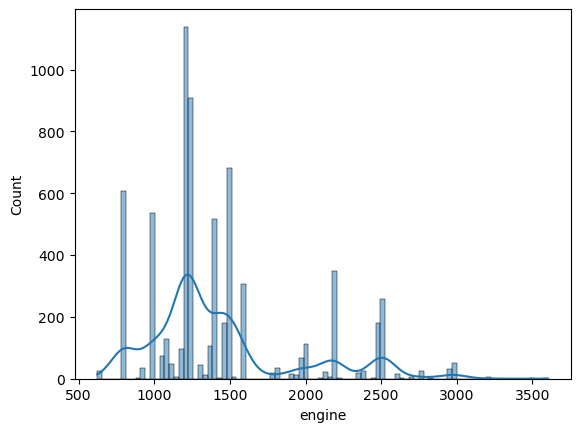

In [333]:
#lets plot Engine
sns.histplot(data['engine'],kde=True)
plt.show()

In [385]:
#Lets convert max_power in int 
# Let's replace "," sign by empty space
data['max_power'] = data['max_power'].str.replace('bhp','')


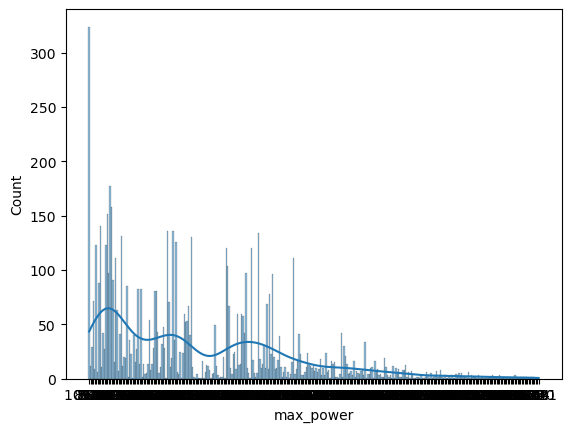

In [335]:
#Lets plot max_power
sns.histplot(x='max_power',data=data,kde=True)
plt.show()

So , Here we can see that we have right skewed data.

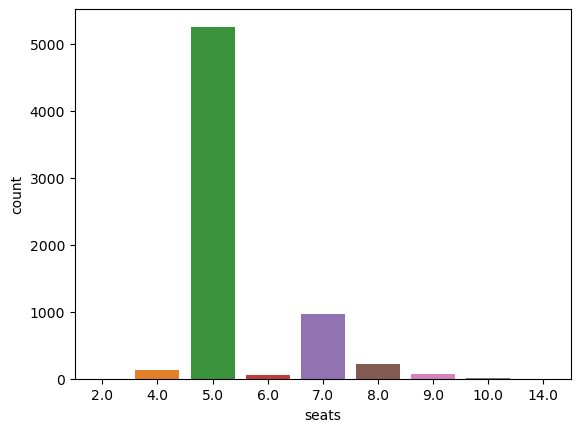

5.0     5254
7.0      966
8.0      222
4.0      124
9.0       74
6.0       57
10.0      18
2.0        2
14.0       1
Name: seats, dtype: int64

In [129]:
#Lets plot seat
sns.countplot(x='seats',data=data)
plt.show()
data['seats'].value_counts()

Here we can see that maximum car have 5 seats and then 7 seats . minimum car have 14 seats but maybe its a outliers. lets move foreward to Bivariate and Make good domain knowledge about this dataset .

# Bivariate Analysis

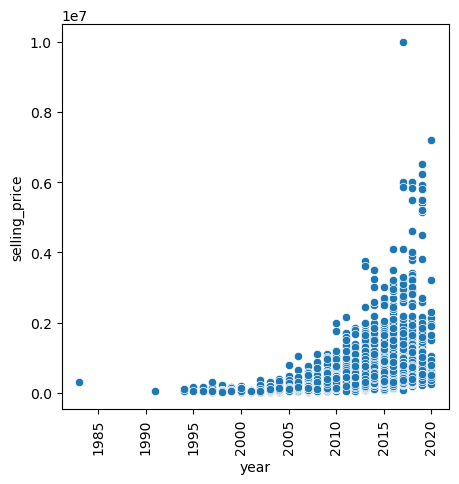

In [131]:
#Lets plot price With Selling tyear
plt.figure(figsize=(5,5))
sns.scatterplot(x='year',y='selling_price',data=data)
plt.xticks(rotation=90)
plt.show()

Here we can see . As year increase price are also increases . and in old time car is not sold..

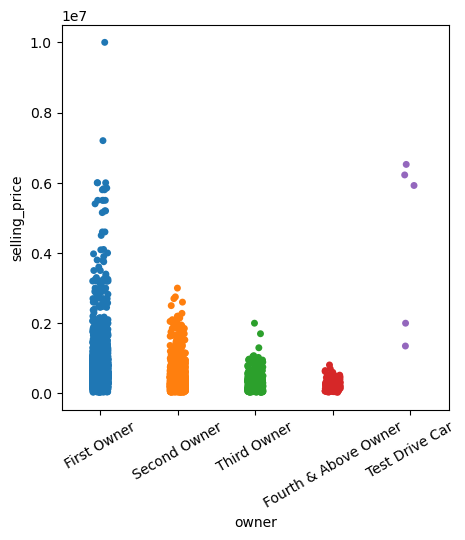

In [141]:
#Lets plot price With owner
plt.figure(figsize=(5,5))
sns.stripplot(y='selling_price',x='owner',data=data)
plt.xticks(rotation=30)
plt.show()

Here we can see that if car is first owner then price is also hight..  Test drive car are very less.

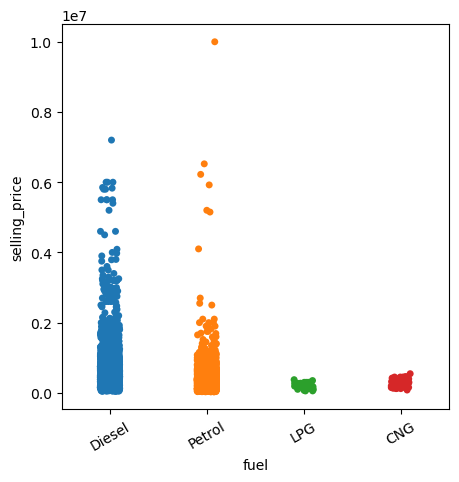

In [142]:
#Lets plot price With fuel
plt.figure(figsize=(5,5))
sns.stripplot(y='selling_price',x='fuel',data=data)
plt.xticks(rotation=30)
plt.show()

Here , We can see that Diesel car are most costly compare to Petrol and then CNG then LPG

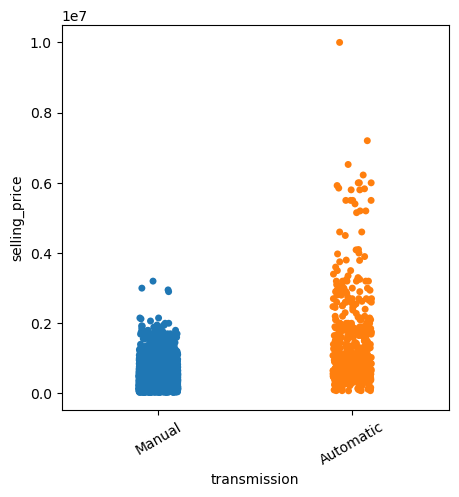

In [144]:
#Lets plot price With transmission
plt.figure(figsize=(5,5))
sns.stripplot(y='selling_price',x='transmission',data=data)
plt.xticks(rotation=30)
plt.show()

Here we can see that  Automatic Car most costly then Mannual.

<Figure size 500x500 with 0 Axes>

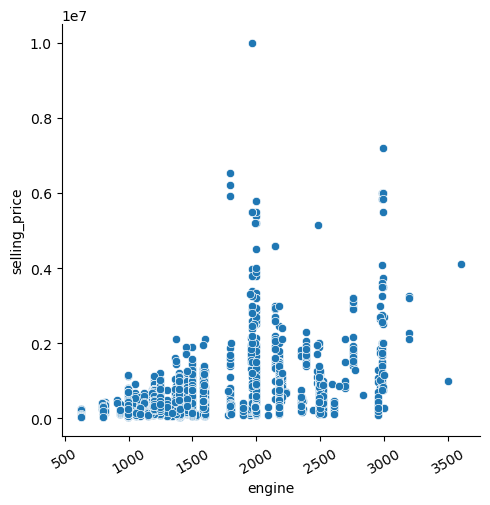

In [150]:
#Lets plot price With engine
plt.figure(figsize=(5,5))
sns.relplot(y='selling_price',x='engine',data=data,)
plt.xticks(rotation=30)
plt.show()

So, Here we can see that as the price increases engine power also increases.

<Figure size 500x500 with 0 Axes>

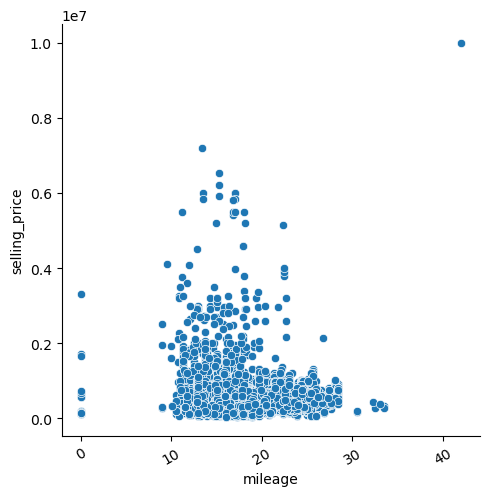

In [155]:
#Lets plot price With mileage
plt.figure(figsize=(5,5))
sns.relplot(y='selling_price',x='mileage',data=data,)
plt.xticks(rotation=30)
plt.show()

Here , We can see that between 10 to 30 most of the car lier . and very few cars are not not comes between 10 to 30

<Figure size 500x500 with 0 Axes>

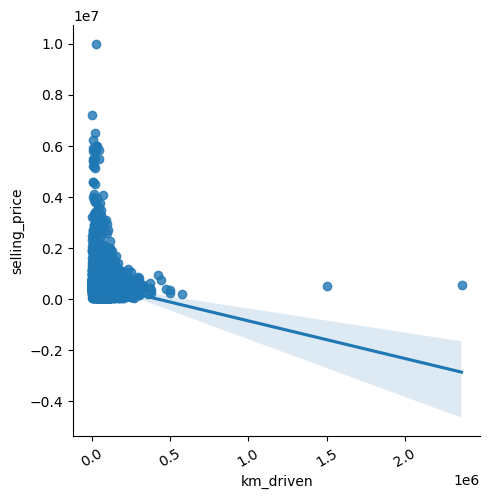

In [158]:
#Lets plot price With km_driven
plt.figure(figsize=(5,5))
sns.lmplot(y='selling_price',x='km_driven',data=data,)
plt.xticks(rotation=30)
plt.show()

So, Here we can see that if the KM increase Price are decreases . and here we can clearly see that its follow Negative Correlation

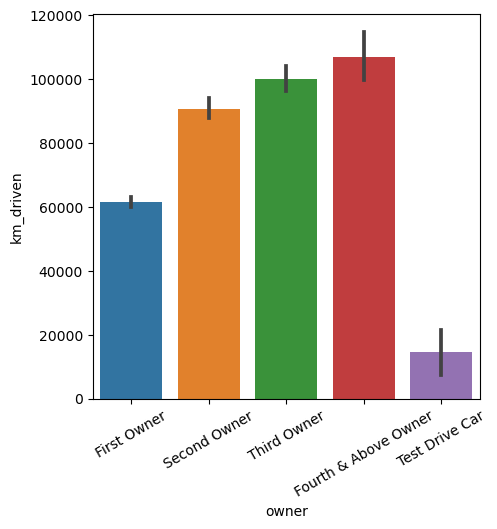

In [164]:
#Lets Owner With km_driven
plt.figure(figsize=(5,5))
sns.barplot(x='owner',y='km_driven',data=data,)
plt.xticks(rotation=30)
plt.show()

So, Here we can see that as the owner going to increase then KM is also increase

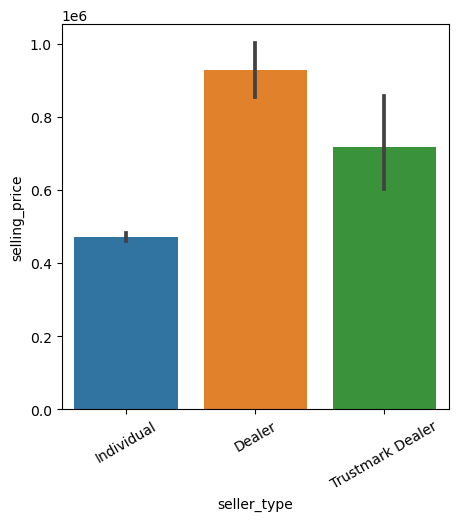

In [167]:
#Lets seller_type With km_driven
plt.figure(figsize=(5,5))
sns.barplot(y='selling_price',x='seller_type',data=data,)
plt.xticks(rotation=30)
plt.show()

So, Here can see that most of the car sold from the dealer then Trustmark Dealer. and then individual

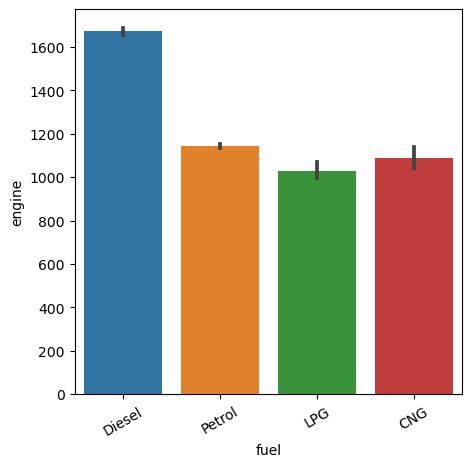

In [172]:
#Lets Fuel With km_driven
plt.figure(figsize=(5,5))
sns.barplot(y='engine',x='fuel',data=data,)
plt.xticks(rotation=30)
plt.show()

So, Here we can see that Diesel car have max power and then Petrol and then LPG and the CNG

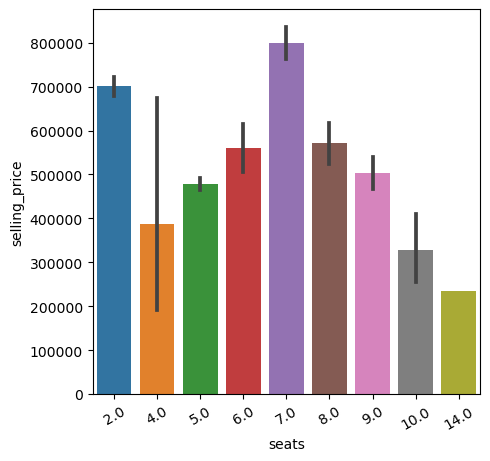

In [173]:
#Lets seats With km_driven
plt.figure(figsize=(5,5))
sns.barplot(y='selling_price',x='seats',data=data,)
plt.xticks(rotation=30)
plt.show()

So, Here we can see that 7 seater car more expensive then other car . and then expensive is 2.0 and then follow to 8 seater car . and least is 14.0 . in my term 14 seater car is outlier

In [174]:
data.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

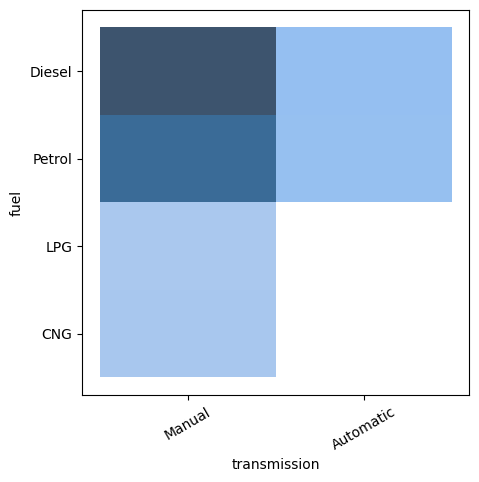

In [179]:
#Lets  Transmission With km_driven
plt.figure(figsize=(5,5))
sns.histplot(x='transmission',y='fuel',data=data,)
plt.xticks(rotation=30)
plt.show()

So, Here we can see that only Mannul car come in Diesel , Petrol , LPG and CNG . But Automatic car only come in Diesel and Petrol

<Figure size 500x500 with 0 Axes>

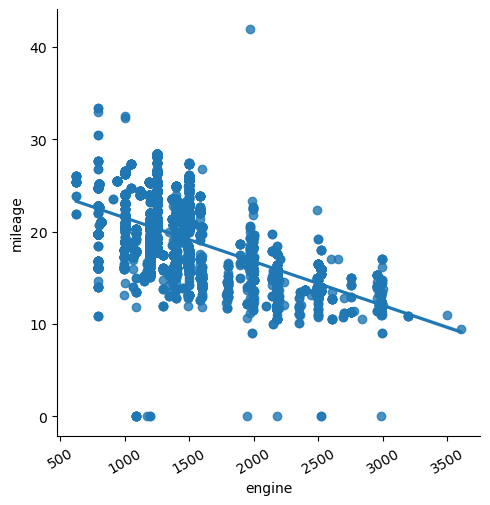

In [183]:
#Lets Owner With km_driven
plt.figure(figsize=(5,5))
sns.lmplot(y='mileage',x='engine',data=data,)
plt.xticks(rotation=30)
plt.show()

 So , Here we can see that . if the price engine power is decreases mileange is increases . and it follow some negative correlation.

# Multivariate Analysis

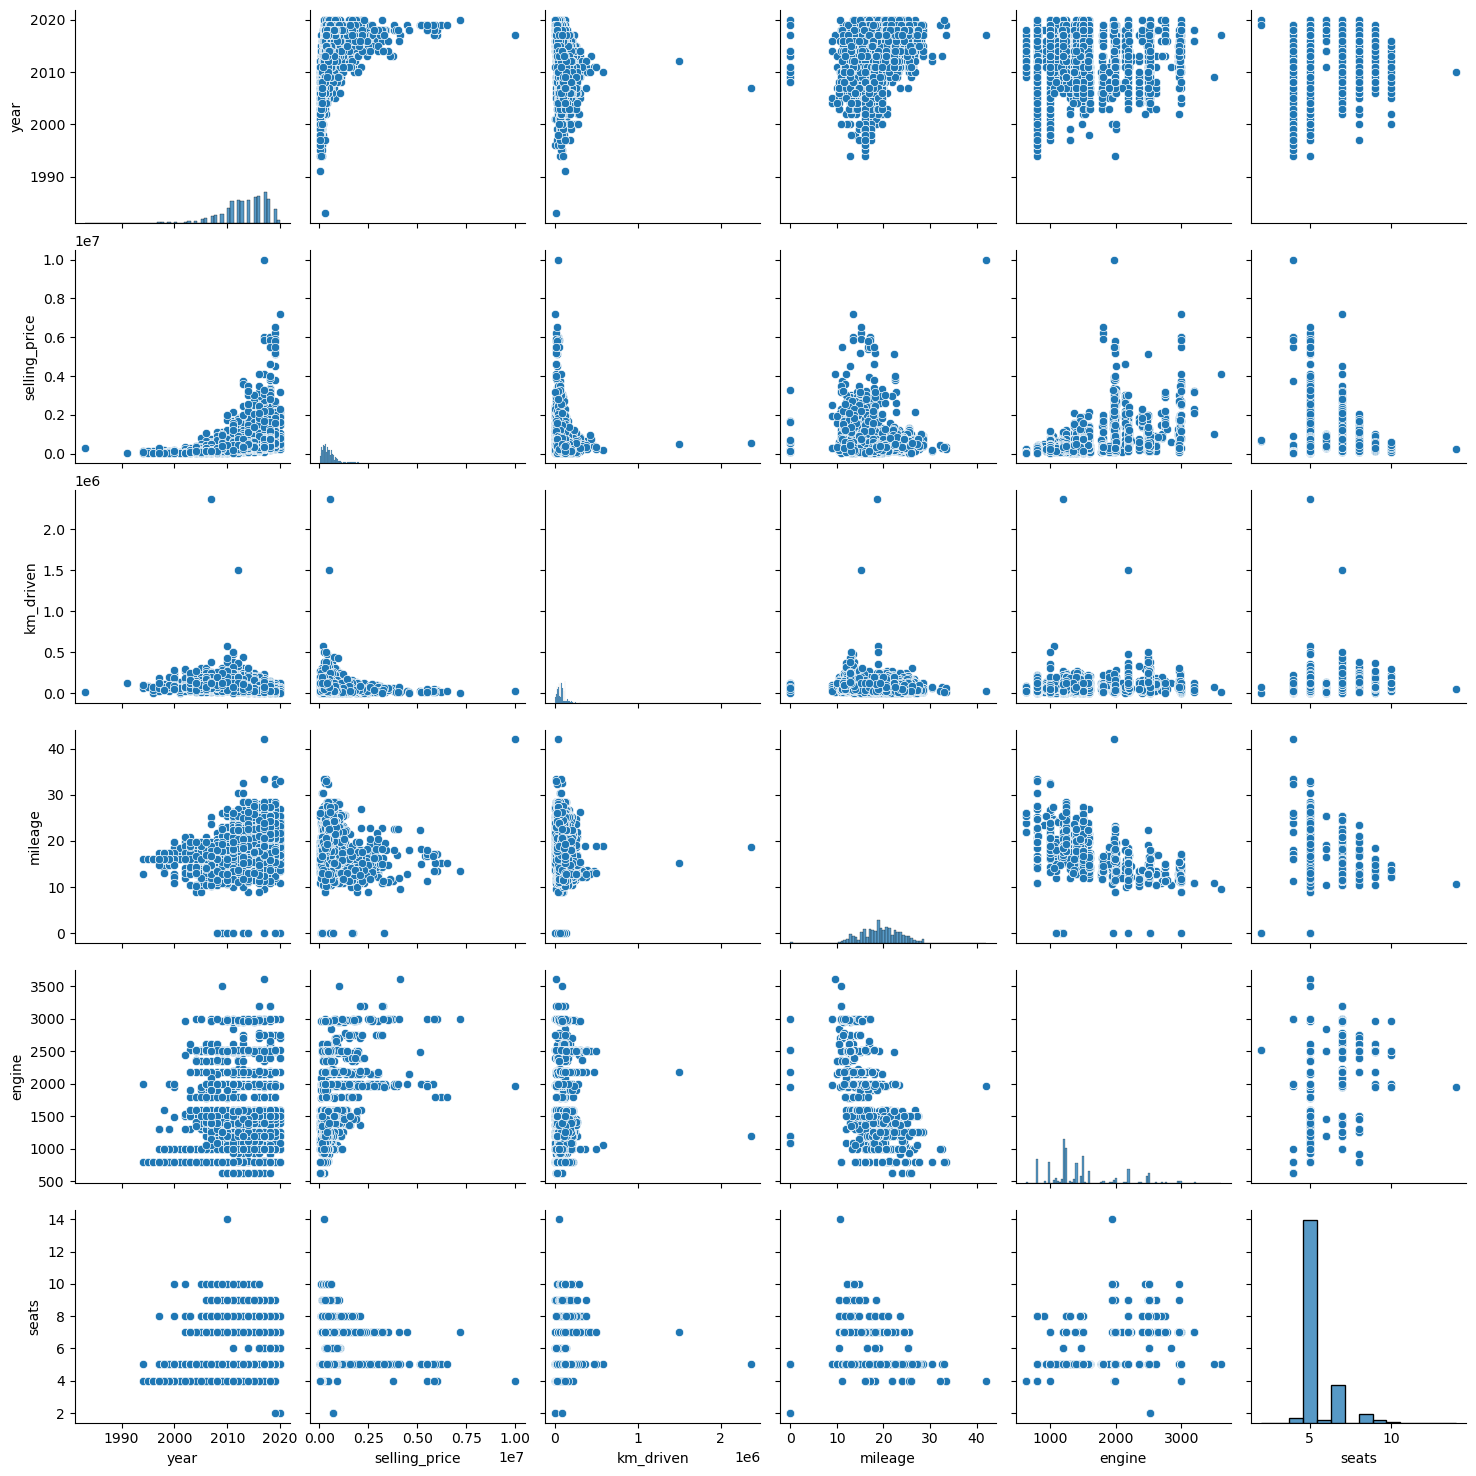

In [186]:
#Lets plot Pair Plor for all Continious Data
sns.pairplot(data)
plt.show()

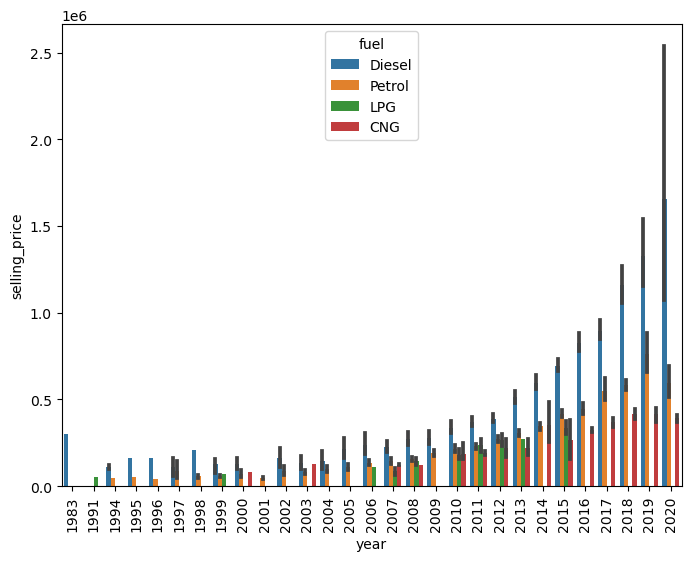

In [189]:
#Lets plot Year With Selling Price and Fuel
plt.figure(figsize=(8,6))
sns.barplot(y='selling_price',x='year',hue='fuel',data=data)
plt.xticks(rotation=90)
plt.show()

So, Here we can see that as the year increases car price is also increases and CNG stareted in 2001. and first LPG car selling start on 1991 and then agian start in 1999 and its continiously start from 2006 and after 2015 LPG car stop manufecturing.

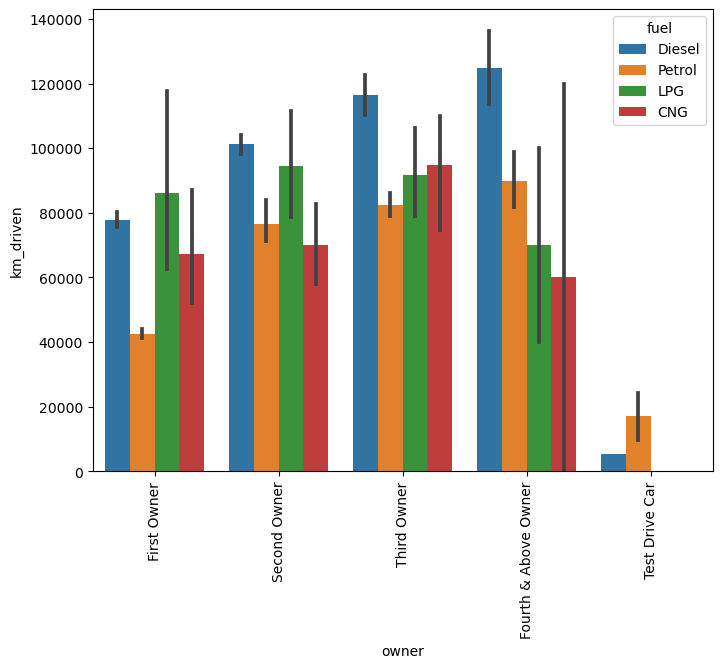

In [192]:
#Lets plot Year With Selling Price and Fuel
plt.figure(figsize=(8,6))
sns.barplot(y='km_driven',x='owner',hue='fuel',data=data)
plt.xticks(rotation=90)
plt.show()

So, Here we can see that as the KM increases Owners is also increases . and we can see that Diesel car are more effecient then  other varients

In [193]:
data.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

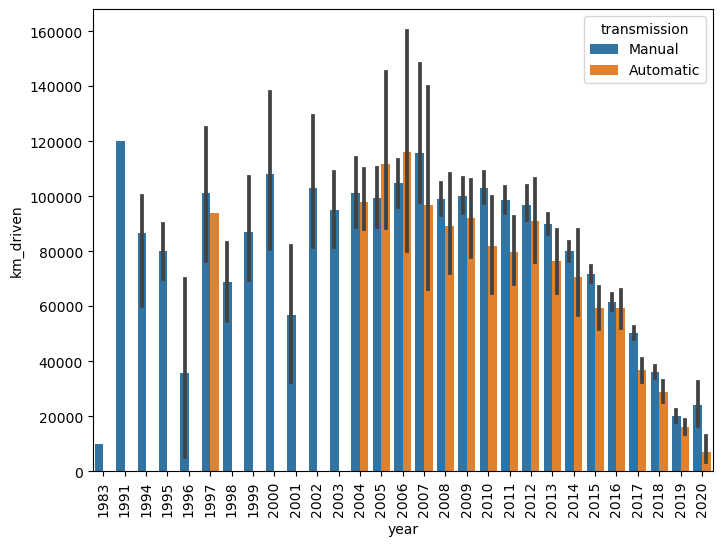

In [195]:
#Lets plot Year With Selling Price and Fuel
plt.figure(figsize=(8,6))
sns.barplot(x='year',y='km_driven',hue='transmission',data=data)
plt.xticks(rotation=90)
plt.show()

So. Here we can see that in earlier time no Automatic car are available but and in 1997 they start selling but the stop in 1997 also. and after 6 year they again start and after 2006 manual and automatic both are sold . and manual car is maximum sold then automatic

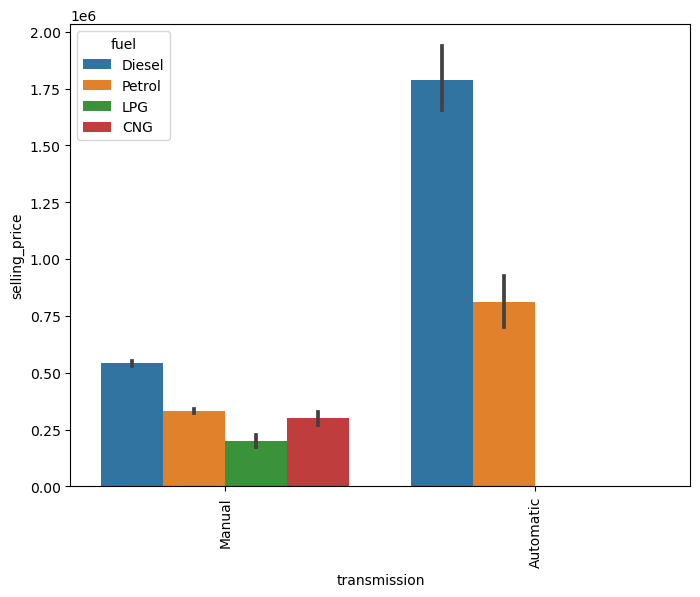

In [196]:
#Lets plot Year With Selling Price and Fuel
plt.figure(figsize=(8,6))
sns.barplot(x='transmission',y='selling_price',hue='fuel',data=data)
plt.xticks(rotation=90)
plt.show()

So, Here we can see that Manual car less expensive then Automatic. and in automatic they wont come with LPG and CNG.

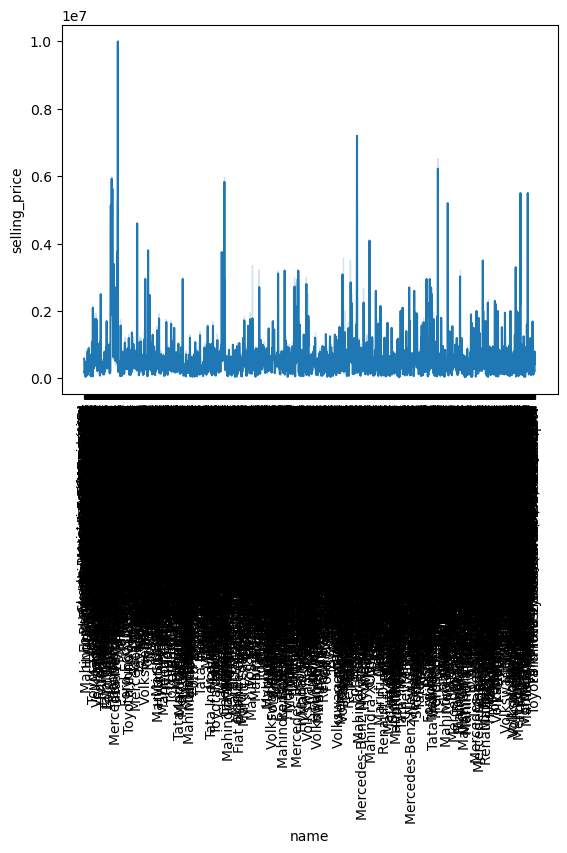

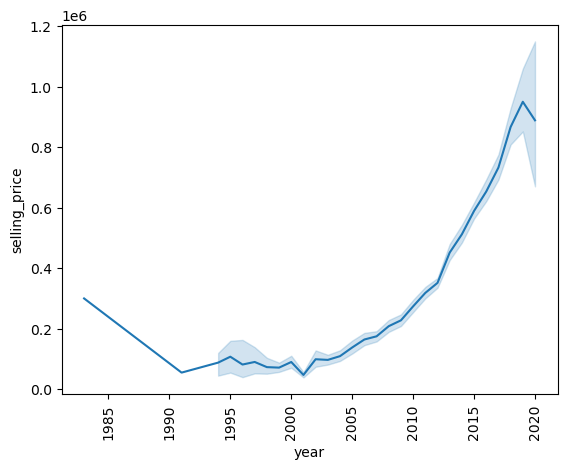

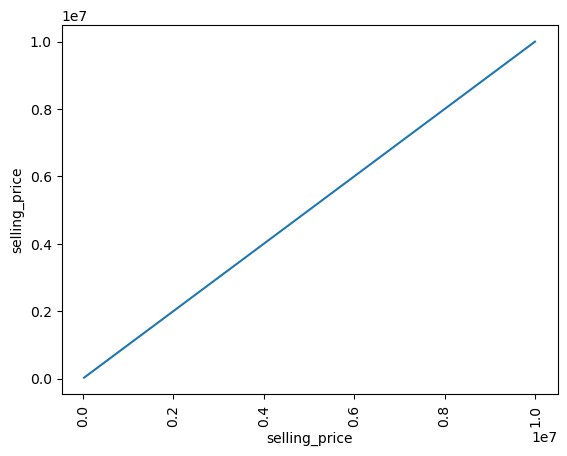

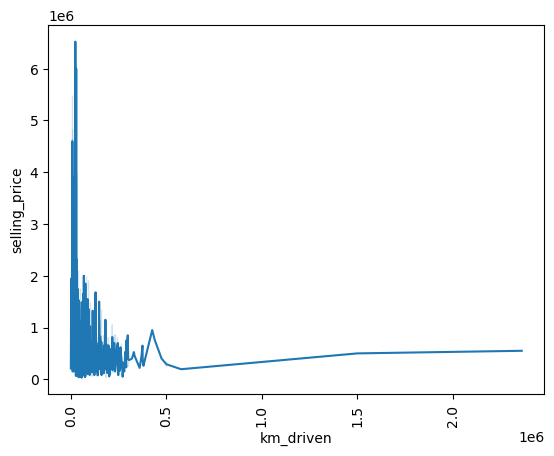

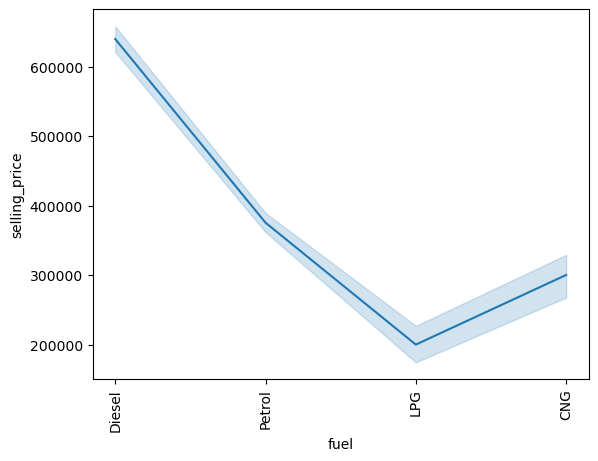

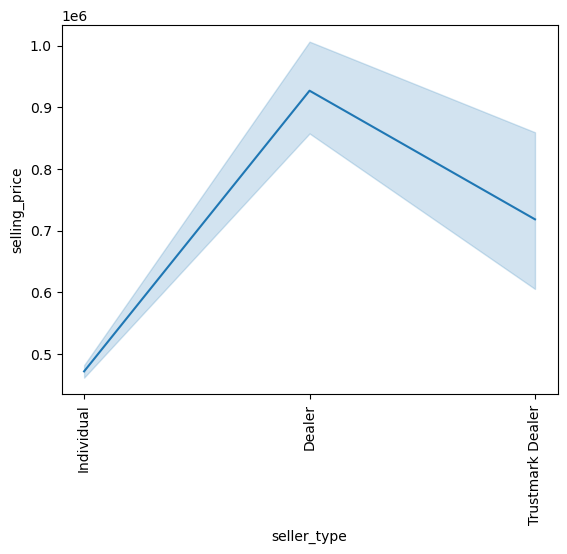

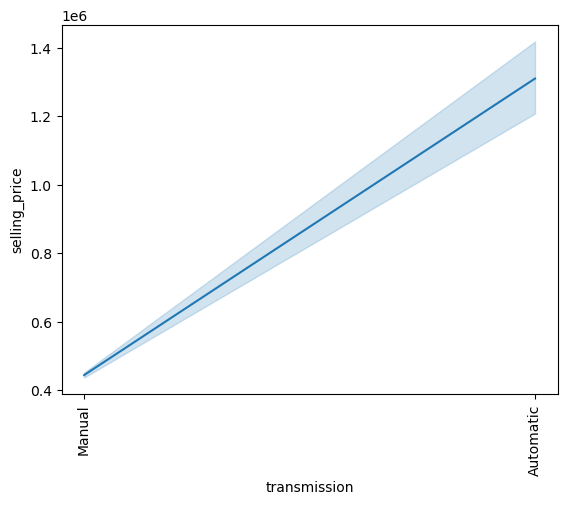

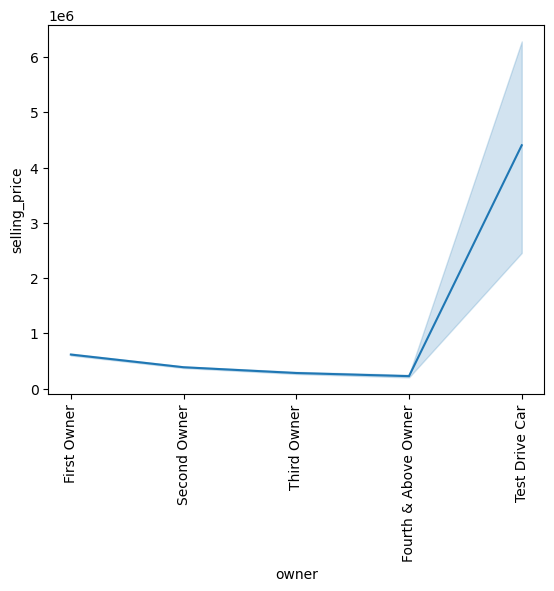

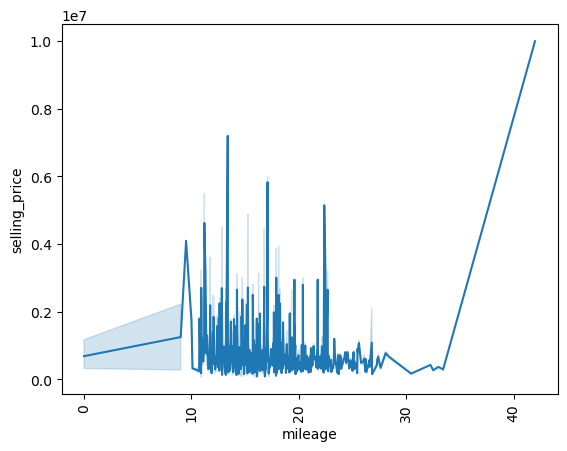

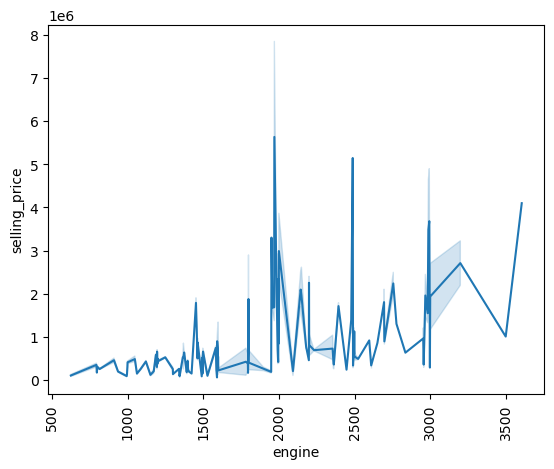

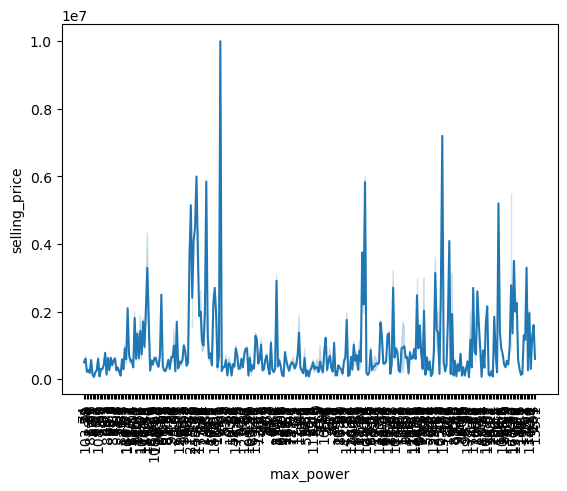

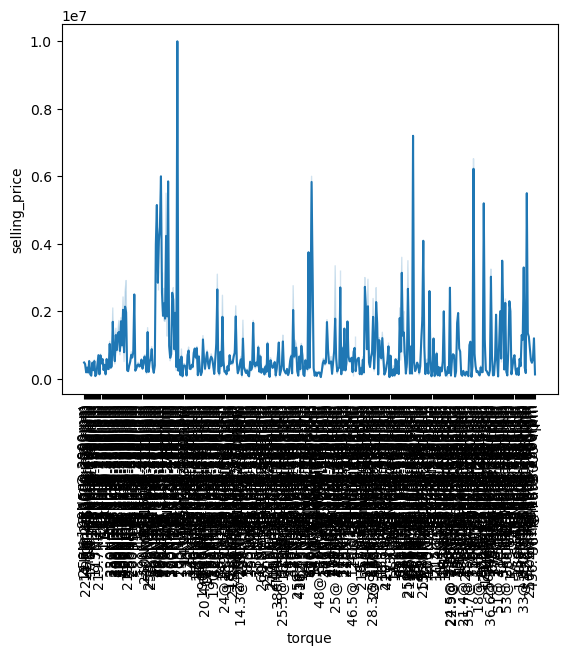

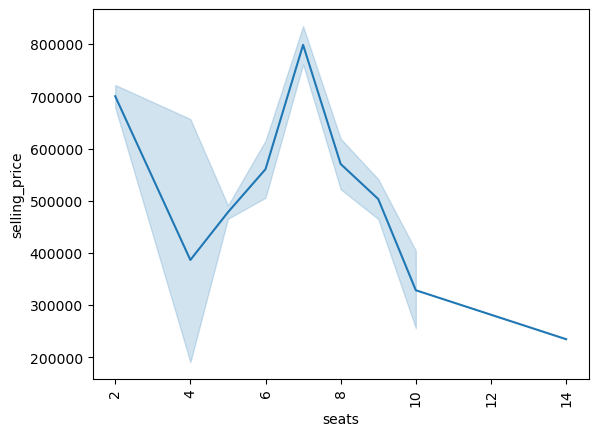

In [198]:
#lets plot Line plot for all columns for checking relation
#Lets plot Rel Plot for checking the relation between feature and label
for i in data:
    plt.figure()
    sns.lineplot(x=data[i],y=data['selling_price'])
    plt.xticks(rotation=90)
    plt.show()

In [212]:
#Select all numerical columns for ploting Distplot and Box plot
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

newdf = data.select_dtypes(include=numerics)
newdf

,year,selling_price,km_driven,mileage,engine,seats
0,2014,450000,145500,23.40,1248.0,5.0
1,2014,370000,120000,21.14,1498.0,5.0
2,2006,158000,140000,17.70,1497.0,5.0
3,2010,225000,127000,23.00,1396.0,5.0
4,2007,130000,120000,16.10,1298.0,5.0
...,...,...,...,...,...,...
8121,2013,260000,50000,18.90,998.0,5.0
8122,2014,475000,80000,22.54,1396.0,5.0
8123,2013,320000,110000,18.50,1197.0,5.0
8124,2007,135000,119000,16.80,1493.0,5.0


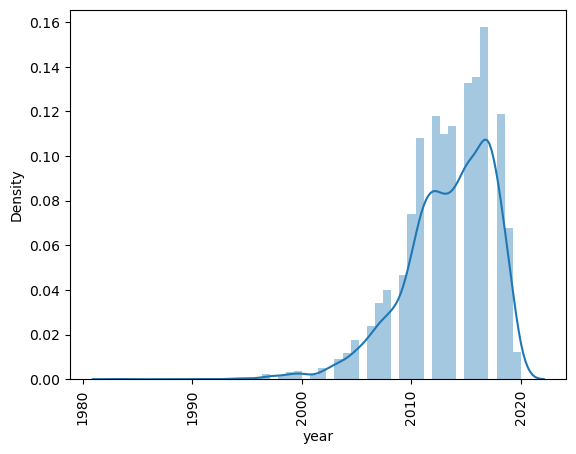

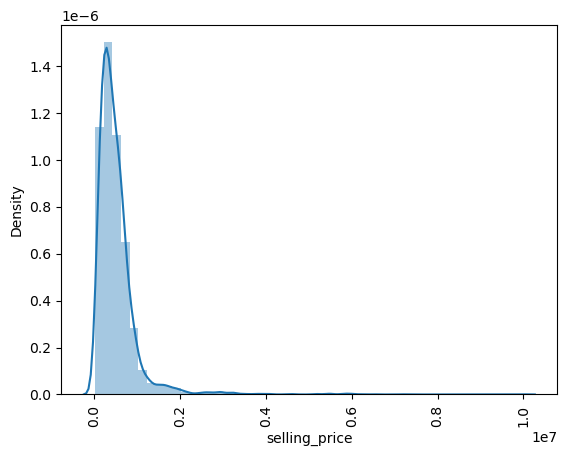

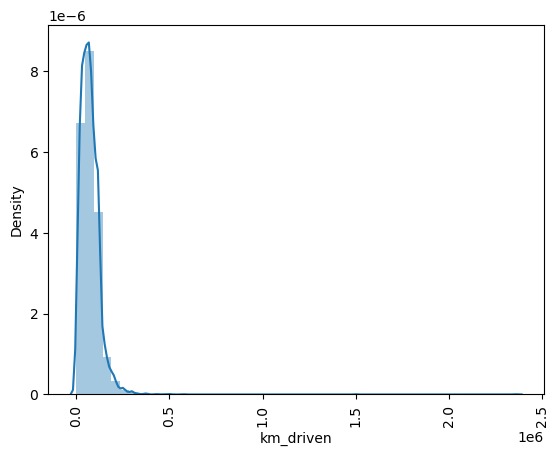

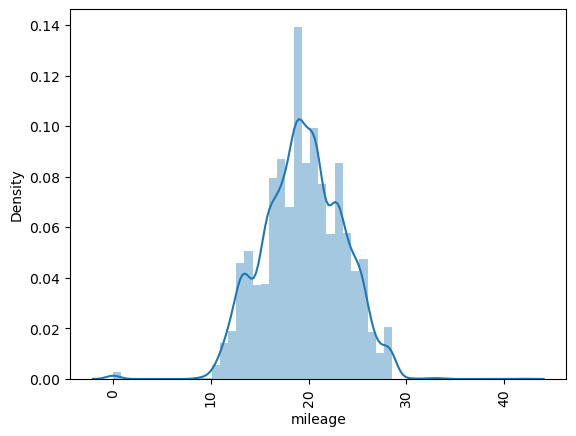

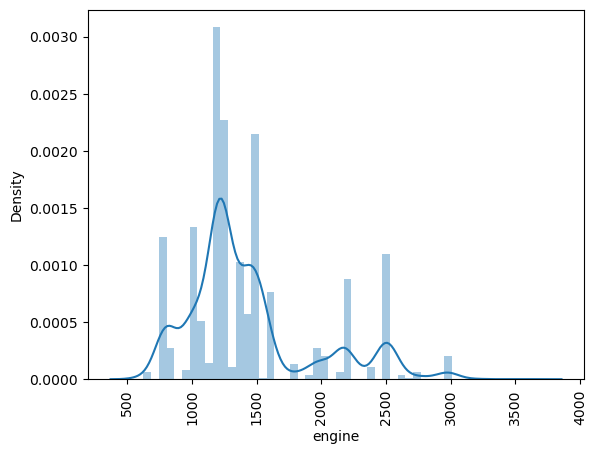

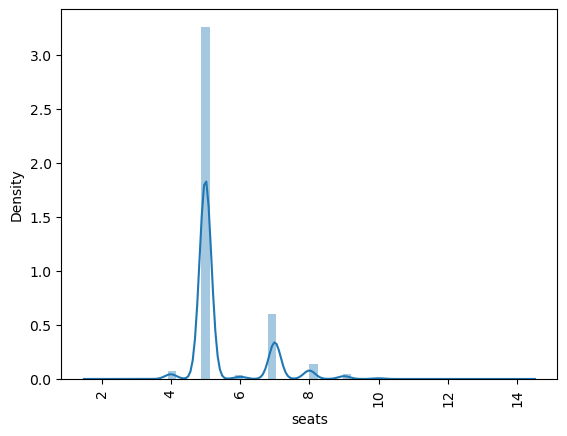

In [216]:
#Lets plot Dist plot
for i in newdf:
    plt.figure()
    sns.distplot(newdf[i])
    plt.xticks(rotation=90)
    plt.show()

So , Here we can see that all the columns are skewed . no one columns are normally distributed

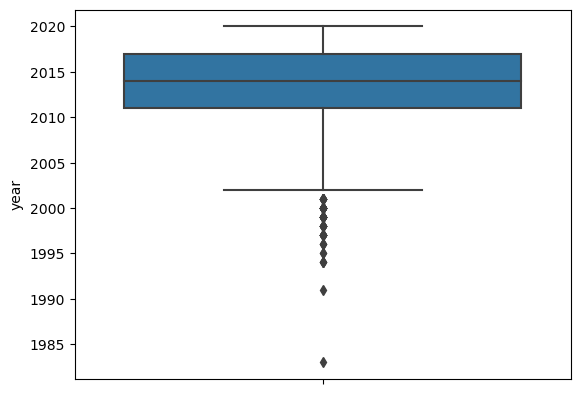

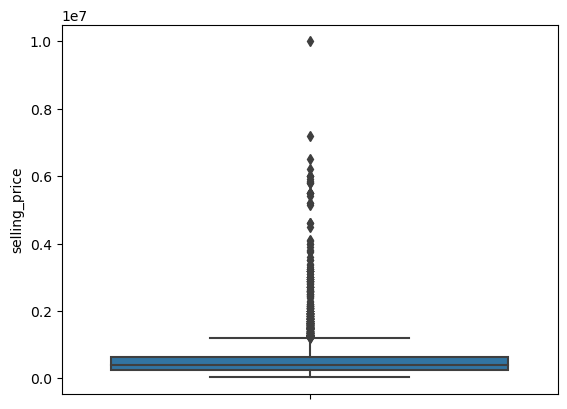

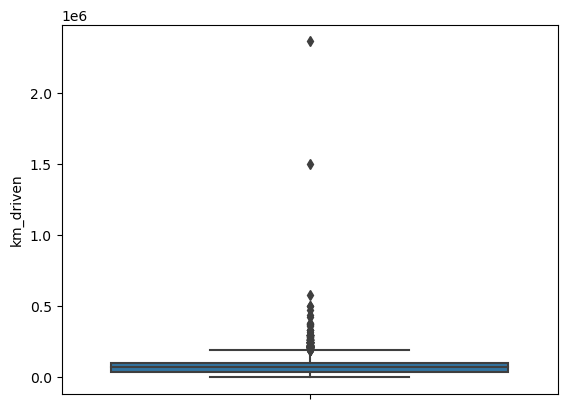

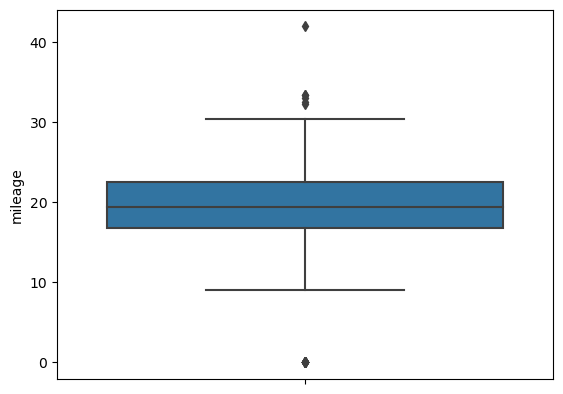

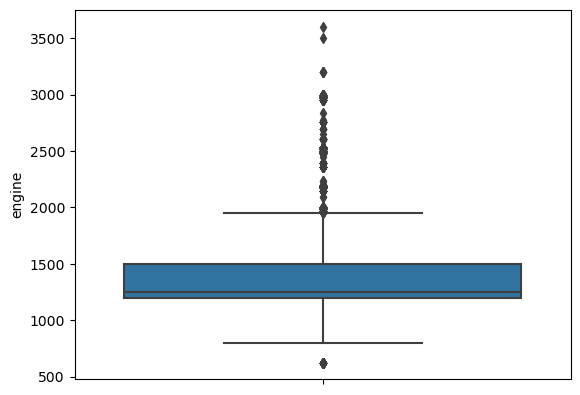

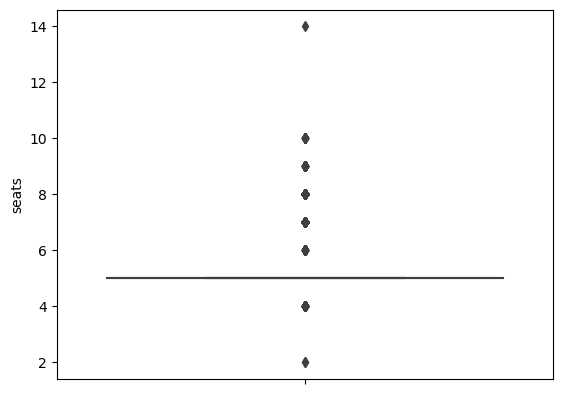

In [218]:
#Lets plot Dist plot
for i in newdf:
    plt.figure()
    sns.boxplot(y=newdf[i])
    plt.xticks(rotation=90)
    plt.show()

So, Here we can see that all the columns are contain Null Values .

** So Here We Completed Visualization Part **  Lets Move Foreward to Data Preprocessing Step.

# Data Preprocessing

In [386]:
#Lets first drop unwanted columns
data.drop(columns=['name','torque'],inplace=True)


This Columns dont participate in model building  So i decided to remove both the columns

In [387]:
#Lets check the shape of the dataseta again
data.shape

(6926, 11)

In [388]:
#Lets check for null values
data.isna().sum()

year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          208
engine           208
max_power        205
seats            208
dtype: int64

Here we have null values Lets fill this by Foreward Fill and Backword Fill Method

In [389]:
#Lets fill the null values
data["mileage"].fillna( method ='ffill', inplace = True)
data["engine"].fillna( method ='bfill', inplace = True)
data["max_power"].fillna( method ='ffill', inplace = True)
data["seats"].fillna( method ='bfill', inplace = True)
data.isna().sum()

year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
seats            0
dtype: int64

In [390]:
#Lets plot dataset again
data.head(10)

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74,5.0
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78,5.0
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90,5.0
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2,5.0
5,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14,1197.0,81.86,5.0
6,2007,96000,175000,LPG,Individual,Manual,First Owner,17.30,1061.0,57.5,5.0
7,2001,45000,5000,Petrol,Individual,Manual,Second Owner,16.10,796.0,37,4.0
8,2011,350000,90000,Diesel,Individual,Manual,First Owner,23.59,1364.0,67.1,5.0
9,2013,200000,169000,Diesel,Individual,Manual,First Owner,20.00,1399.0,68.1,5.0


In [391]:
#Lets Check for Outliers
#Select all numerical columns for ploting Distplot and Box plot
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

newdf = data.select_dtypes(include=numerics)
newdf

,year,selling_price,km_driven,mileage,engine,seats
0,2014,450000,145500,23.40,1248.0,5.0
1,2014,370000,120000,21.14,1498.0,5.0
2,2006,158000,140000,17.70,1497.0,5.0
3,2010,225000,127000,23.00,1396.0,5.0
4,2007,130000,120000,16.10,1298.0,5.0
...,...,...,...,...,...,...
8121,2013,260000,50000,18.90,998.0,5.0
8122,2014,475000,80000,22.54,1396.0,5.0
8123,2013,320000,110000,18.50,1197.0,5.0
8124,2007,135000,119000,16.80,1493.0,5.0


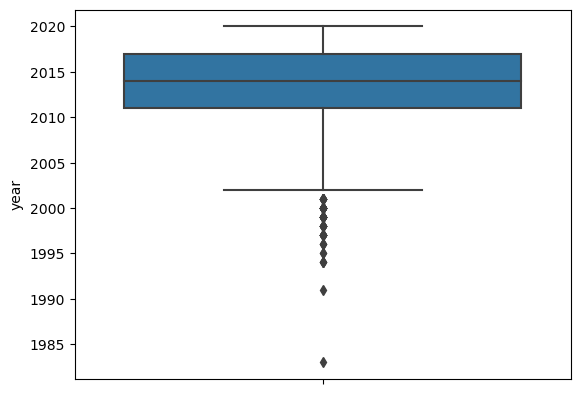

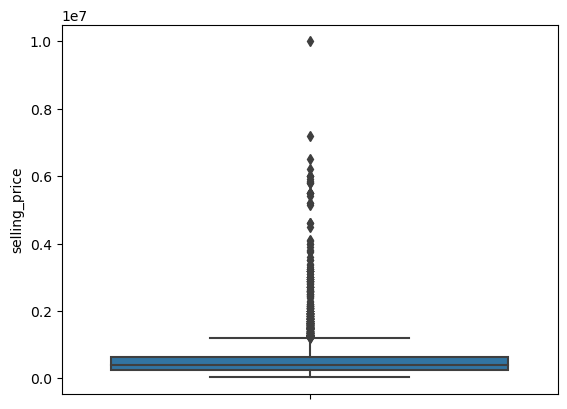

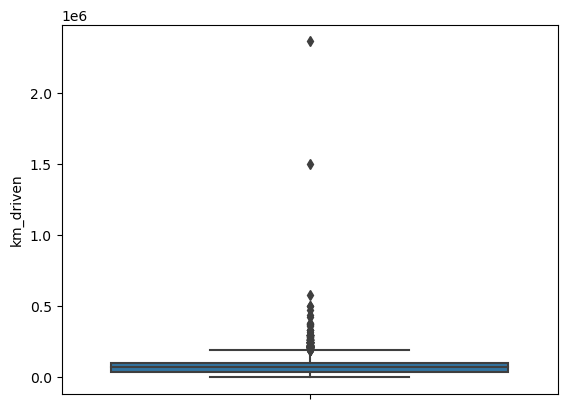

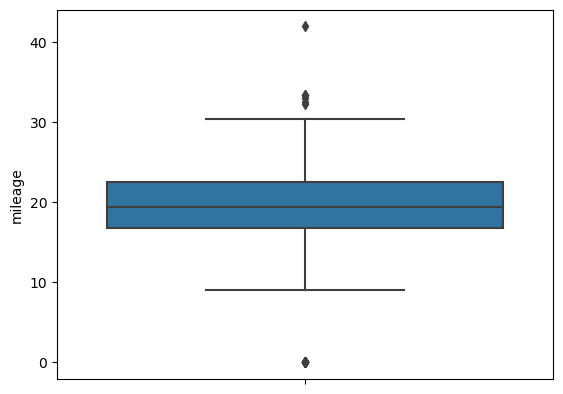

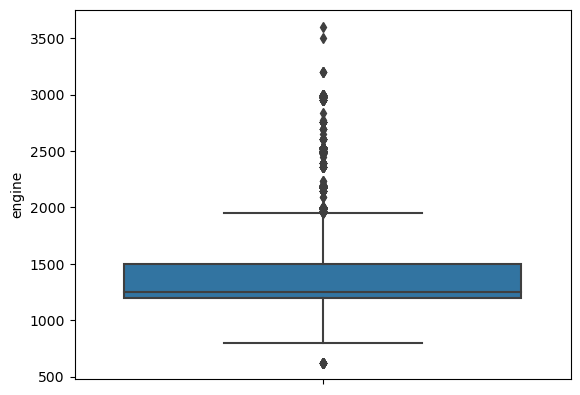

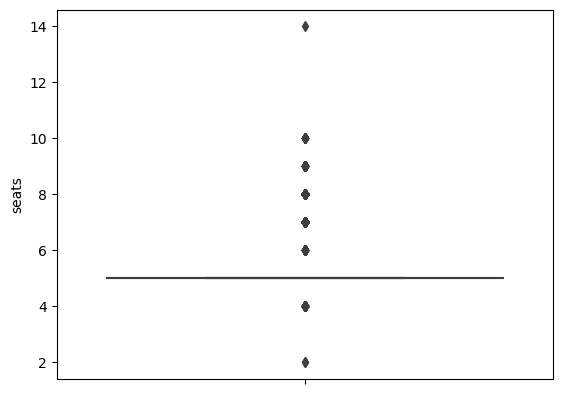

In [392]:
#Lets plot Dist plot
for i in newdf:
    plt.figure()
    sns.boxplot(y=newdf[i])
    plt.xticks(rotation=90)
    plt.show()

# Lets Remove Outliers


In [393]:
import numpy as np
from scipy.stats import zscore

In [394]:
features = data[['year','km_driven','mileage','engine','seats']]

In [395]:
# Using zscore to remove outliers

z=np.abs(zscore(features))

z

,year,km_driven,mileage,engine,seats
0,0.142153,1.225357,0.973216,0.369543,0.44018
1,0.142153,0.788368,0.416753,0.138280,0.44018
2,1.819597,1.131104,0.430252,0.136249,0.44018
3,0.838722,0.908326,0.874727,0.068911,0.44018
4,1.574378,0.788368,0.824208,0.267978,0.44018
...,...,...,...,...,...
8121,0.103066,0.411210,0.134785,0.877366,0.44018
8122,0.142153,0.102895,0.761464,0.068911,0.44018
8123,0.103066,0.617000,0.233274,0.473139,0.44018
8124,1.574378,0.771231,0.651852,0.128124,0.44018


In [396]:
# Creating new dataframe
new_df = data[(z<3).all(axis=1)] 
new_df

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74,5.0
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78,5.0
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90,5.0
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2,5.0
...,...,...,...,...,...,...,...,...,...,...,...
8121,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.90,998.0,67.1,5.0
8122,2014,475000,80000,Diesel,Individual,Manual,Second Owner,22.54,1396.0,88.73,5.0
8123,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,5.0
8124,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110,5.0


In [397]:
# Shape of original dataset
data.shape

(6926, 11)

In [398]:
#After Removing Outliers
new_df.shape

(6592, 11)

In [399]:
# Checking the the data loss
data_loss = (6926-6592)/6926*100
data_loss

4.822408316488594

Here we loss 4.822 % Data

# ii) IQR (Inter Quantile Range) method

In [400]:
# 1st quantile
Q1=features.quantile(0.25)

# 3rd quantile
Q3=features.quantile(0.75)

# IQR
IQR=Q3 - Q1

df1=data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]

In [401]:
df1.shape

(5071, 11)

In [402]:
# Checking the the data loss
data_loss = (6926-5071)/6926*100
data_loss

26.783136009240543

So, in IQR Method we can see that we lost out 26.78 % data . lets move foreward with Z score if we dont get better result with Z Score Method then we choose IQR Method.

# Encoding the categorical columns using Label Encoding

In [403]:
# checking for categorical columns
categorical_col=[]
for i in data.dtypes.index:
    if data.dtypes[i]=='object':
        categorical_col.append(i)
print(categorical_col)

['fuel', 'seller_type', 'transmission', 'owner', 'max_power']


In [404]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
new_df[categorical_col]= new_df[categorical_col].apply(LE.fit_transform)

In [405]:
new_df[categorical_col]

,fuel,seller_type,transmission,owner,max_power
0,1,1,1,0,214
1,1,1,1,2,14
2,3,1,1,4,223
3,1,1,1,0,267
4,3,1,1,0,258
...,...,...,...,...,...
8121,3,1,1,2,196
8122,1,1,1,2,262
8123,3,1,1,0,237
8124,1,1,1,1,28


# Correlation between the target variable and features using HEAT map

In [407]:
# Checking the correlation
cor = new_df.corr()
cor

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
year,1.000000,0.485137,-0.495862,-0.054363,-0.124382,-0.147699,-0.463544,0.360070,-0.024181,0.108123,0.037768
selling_price,0.485137,1.000000,-0.236053,-0.252135,-0.253908,-0.430195,-0.241834,-0.087713,0.425434,-0.197011,0.202561
km_driven,-0.495862,-0.236053,1.000000,-0.349251,0.128289,0.146417,0.315088,-0.199564,0.271241,-0.122264,0.192913
fuel,-0.054363,-0.252135,-0.349251,1.000000,0.037980,-0.043888,-0.019239,-0.135825,-0.501120,0.118053,-0.320583
seller_type,-0.124382,-0.253908,0.128289,0.037980,1.000000,0.170713,0.142815,-0.014888,-0.078601,0.024822,0.015127
transmission,-0.147699,-0.430195,0.146417,-0.043888,0.170713,1.000000,0.081100,0.148894,-0.175417,0.168502,0.019529
owner,-0.463544,-0.241834,0.315088,-0.019239,0.142815,0.081100,1.000000,-0.172817,0.035306,-0.077686,0.003736
mileage,0.360070,-0.087713,-0.199564,-0.135825,-0.014888,0.148894,-0.172817,1.000000,-0.544694,0.462704,-0.441922
engine,-0.024181,0.425434,0.271241,-0.501120,-0.078601,-0.175417,0.035306,-0.544694,1.000000,-0.436806,0.646783
max_power,0.108123,-0.197011,-0.122264,0.118053,0.024822,0.168502,-0.077686,0.462704,-0.436806,1.000000,-0.321247


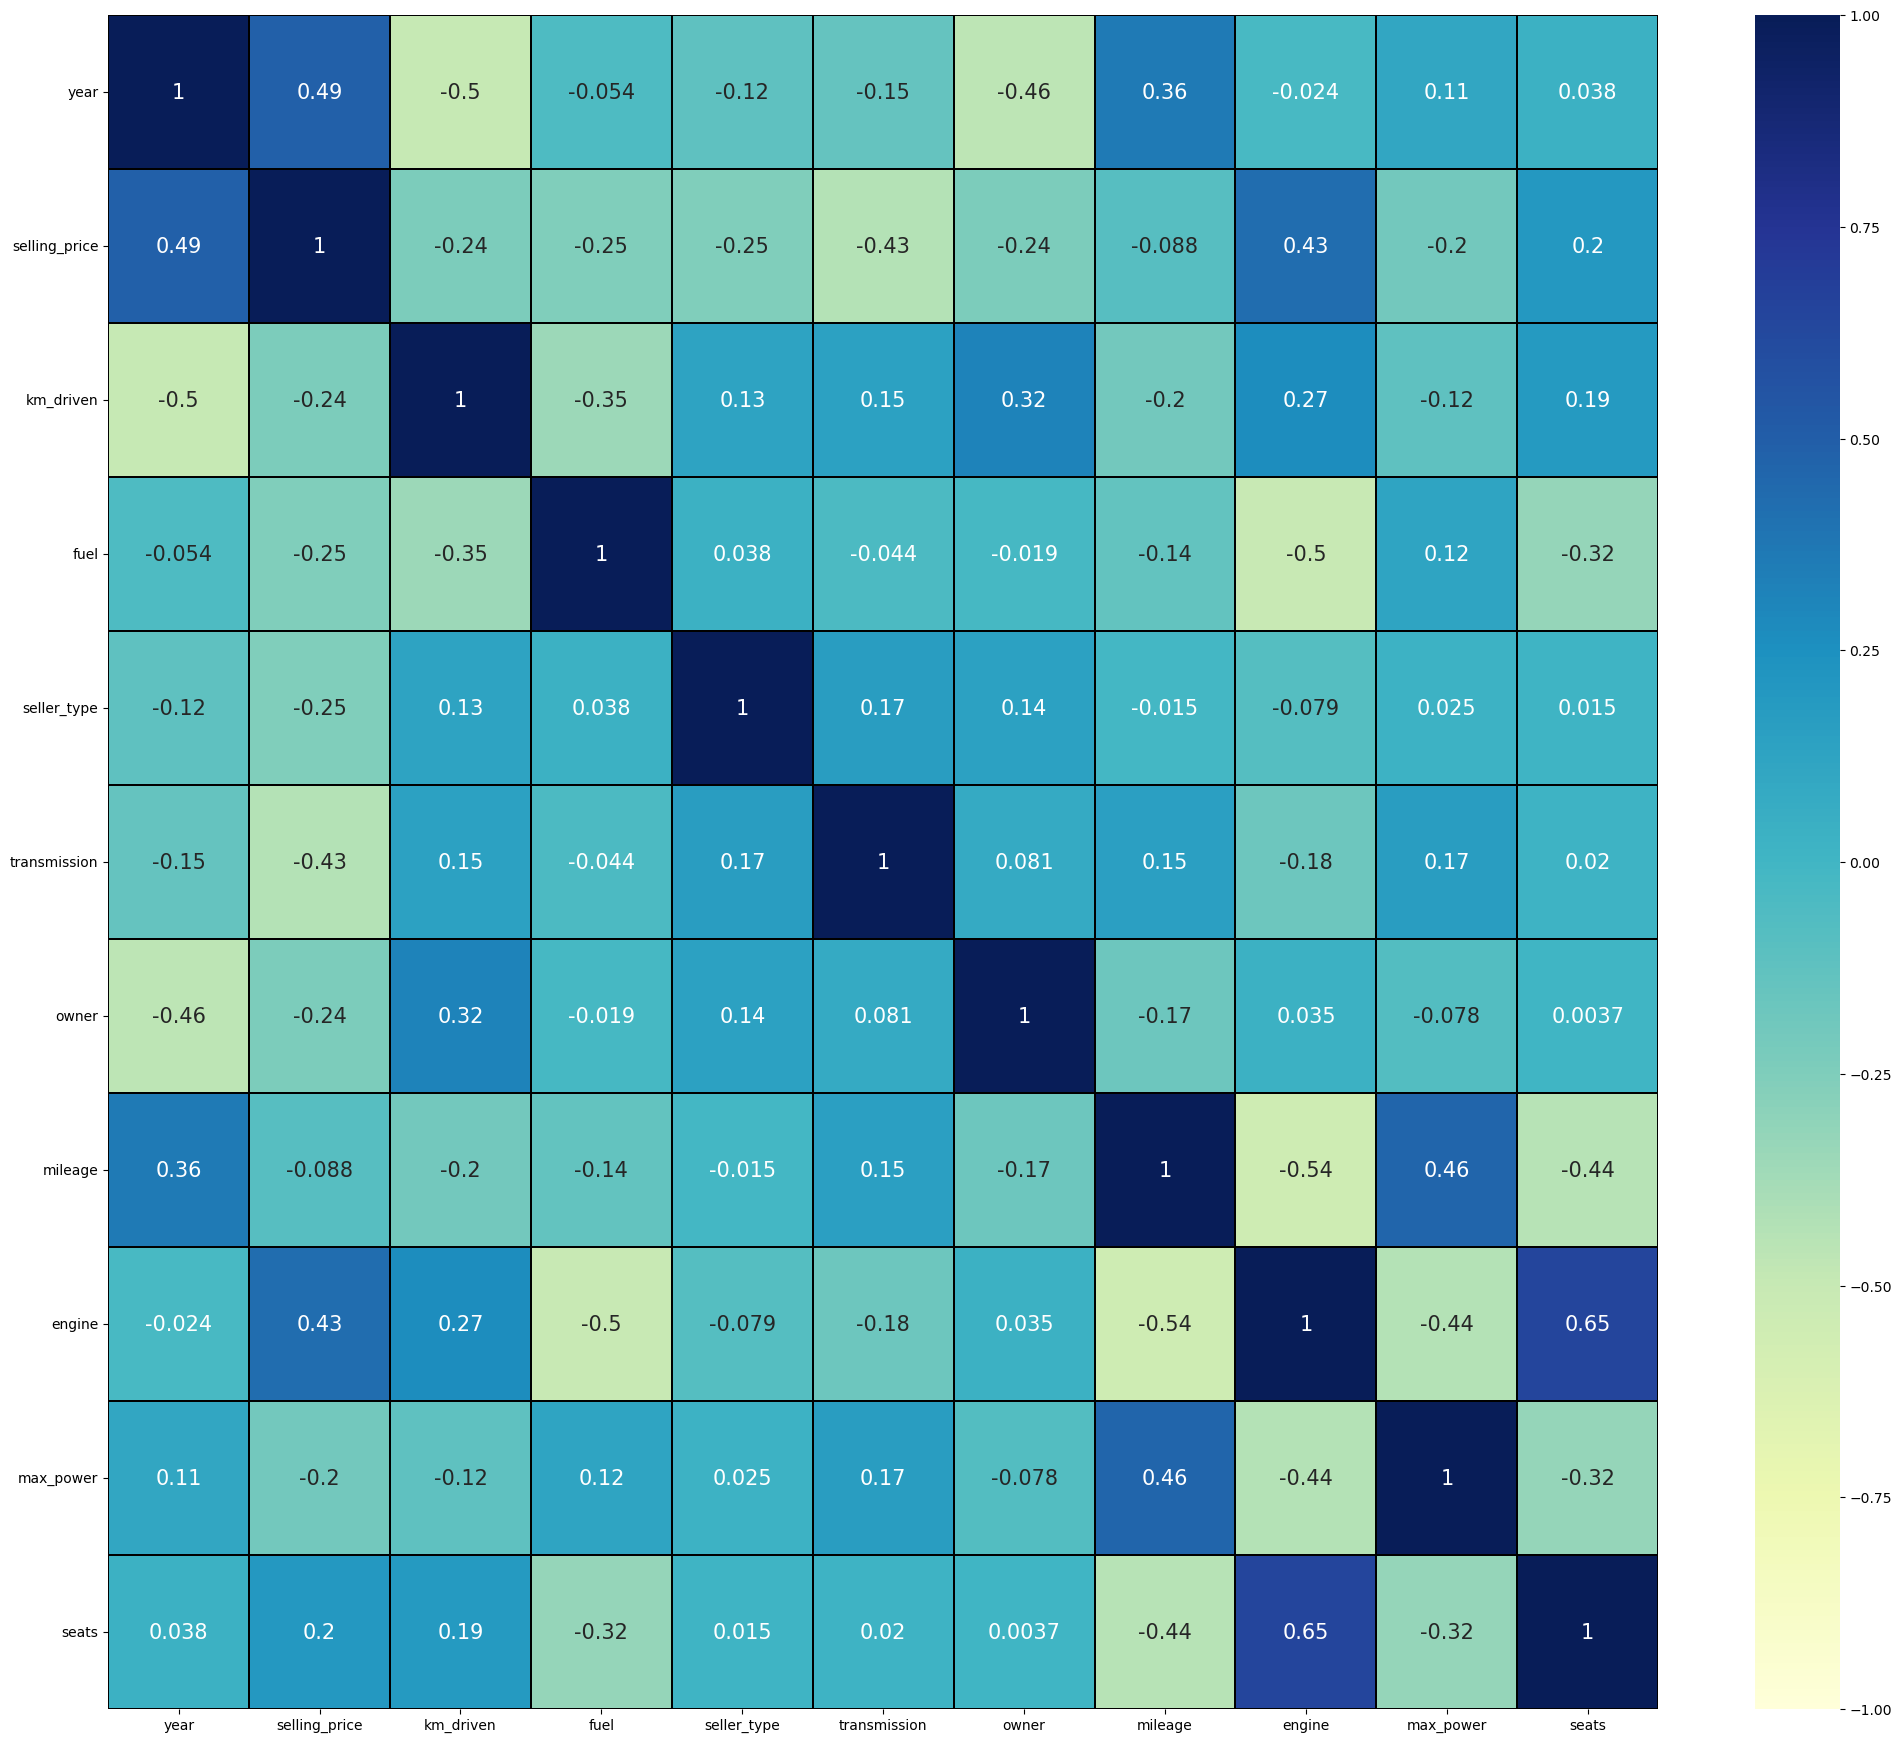

In [408]:
# Visualizing the correlation matrix by plotting heat map.
plt.figure(figsize=(25,22))
sns.heatmap(new_df.corr(),linewidths=.1,vmin=-1, vmax=1, fmt='.2g', annot = True, linecolor="black",annot_kws={'size':15},cmap="YlGnBu")
plt.yticks(rotation=0);

# Visualizing the correlation between label(primary_fuel) and features using bar plot

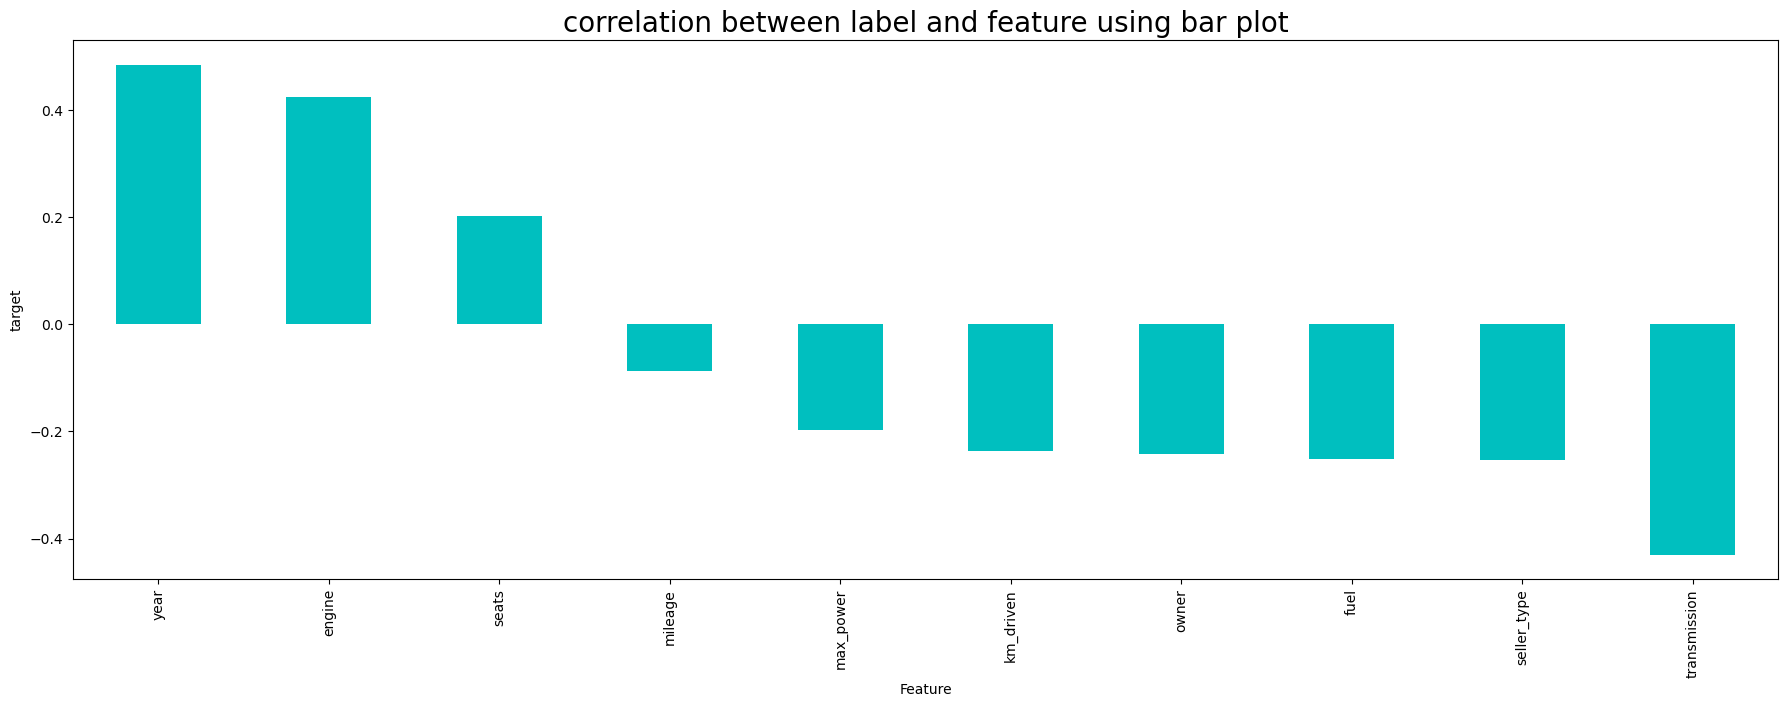

In [410]:
plt.figure(figsize=(22,7))
new_df.corr()['selling_price'].sort_values(ascending=False).drop(['selling_price']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=10)
plt.ylabel('target',fontsize=10)
plt.title('correlation between label and feature using bar plot',fontsize=20)
plt.show()

OBSERVATIONS

Positive Correlation

    Year Have High Positive  Correlation
    Engine Have High Positive Correlation
   
Negative Correlation
    
    Transmission Have High Negative Correlation
    Seller_tyre have High Negative Correlation
    Fuel have Negative Correlation
    Owner Have Negativa Correlation

# Model Building

In [411]:
x = new_df.drop("selling_price", axis=1)
y = new_df["selling_price"]

In [412]:
#Lets check for the shape of the x
x.shape

(6592, 10)

In [413]:
#Lets check for the shape of y
y.shape

(6592,)

# Checking for skewness

In [414]:
x.skew()

year           -0.650579
km_driven       0.790861
fuel            0.143017
seller_type    -2.317391
transmission   -3.109808
owner           1.128727
mileage        -0.006642
engine          1.170970
max_power      -0.800499
seats           1.802324
dtype: float64

Here , i am setting the threshold for +/-1.So , Our data all the data come into our range so we are not going to use power transformer

# Feature Scaling

In [415]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x.head()

,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,0.096747,1.744021,-0.903729,0.311263,0.293862,-0.710218,0.964879,-0.329355,0.476587,-0.429548
1,0.096747,1.149155,-0.903729,0.311263,0.293862,0.886561,0.374162,0.236822,-2.034231,-0.429548
2,-2.029990,1.615716,1.088374,0.311263,0.293862,2.483339,-0.524982,0.234558,0.589574,-0.429548
3,-0.966622,1.312451,-0.903729,0.311263,0.293862,-0.710218,0.860327,0.005822,1.141954,-0.429548
4,-1.764148,1.149155,1.088374,0.311263,0.293862,-0.710218,-0.943188,-0.216120,1.028967,-0.429548


# Checking VIF- Variance Inflation Factor values


In [416]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

# Let's check the values
vif

,VIF values,Features
0,1.979842,year
1,1.702188,km_driven
2,2.276278,fuel
3,1.067803,seller_type
4,1.179475,transmission
5,1.301232,owner
6,2.949649,mileage
7,3.533745,engine
8,1.374789,max_power
9,1.917988,seats


In VIF i am setting threshold for +/- 10 . and our all data points comes in our range . its means we dont any multicollinearity problem

# Lets Build Model

In [420]:
#Lets create with random forest
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [423]:
# finding Best Random state
maxAccu=0
maxRS=0

for i in range(1, 1000):
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=i)
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    pred = lr.predict(X_test)
    r2 = r2_score(y_test, pred)
    
    if r2>maxAccu:
        maxAccu=r2
        maxRS=i

print("Best r2 score is", maxAccu,"on Random State", maxRS)

Best r2 score is 0.6398540773584863 on Random State 463


In [424]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=463)

In [425]:
regressors = {
    
    'Random Forest' : LinearRegression(),
    
}

results=pd.DataFrame(columns=['MAE','MSE', 'RMSE', 'R2-score'])

for method,func in regressors.items():
    model = func.fit(X_train,y_train)
    pred = model.predict(X_test)
    results.loc[method]= [np.round(mean_absolute_error(y_test,pred),3),
                          np.round(mean_squared_error(y_test,pred),3),
                          np.sqrt(mean_squared_error(y_test,pred)),
                          np.round(r2_score(y_test,pred),3)
                          
                         ]
results

,MAE,MSE,RMSE,R2-score
Random Forest,161732.01,6.813610e+10,261028.91931,0.64


# Best Fit Line

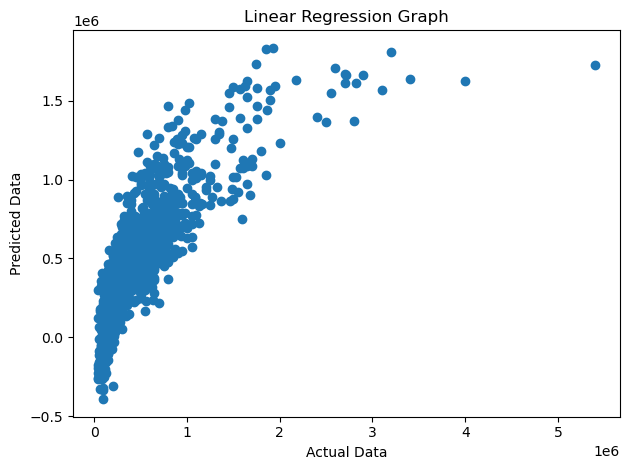

In [430]:
plt.scatter(y_test,pred)
plt.xlabel('Actual Data')
plt.ylabel('Predicted Data')
plt.title('Linear Regression Graph')
plt.tight_layout()

# Cross - Validation of the mode

In [427]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
lss  = r2_score(y_test,y_pred)

In [429]:
# from sklearn.model_selection import cross_val_score
for j in range(2,10):
    isscore = cross_val_score(lr,x,y,cv=j)
    lsc = isscore.mean()
    print("At cv:-",j)
    print('Cross validation score is:-',lsc*100)
    print('accuracy_score is:-',lss*100)
    print('\n')

At cv:- 2
Cross validation score is:- 54.14853710645359
accuracy_score is:- 63.98540773584863


At cv:- 3
Cross validation score is:- 53.721185562132526
accuracy_score is:- 63.98540773584863


At cv:- 4
Cross validation score is:- 53.99807204953815
accuracy_score is:- 63.98540773584863


At cv:- 5
Cross validation score is:- 54.3884838743959
accuracy_score is:- 63.98540773584863


At cv:- 6
Cross validation score is:- 54.104725438397935
accuracy_score is:- 63.98540773584863


At cv:- 7
Cross validation score is:- 54.950054059953246
accuracy_score is:- 63.98540773584863


At cv:- 8
Cross validation score is:- 54.47080135153672
accuracy_score is:- 63.98540773584863


At cv:- 9
Cross validation score is:- 55.5204726874001
accuracy_score is:- 63.98540773584863




# Lets do Hyperparameter Tuning

In [431]:
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV

In [432]:
lasscv=LassoCV(alphas = None , max_iter =100,normalize=True)
lasscv.fit(X_train,y_train)

LassoCV(max_iter=100, normalize=True)

In [433]:
#best alpha paremetere
alpha=lasscv.alpha_
alpha

15.143643981952163

In [434]:
#Now that we have best parameter,Lets use Lasso regression and see how well our data has fitted before
lasso_reg=Lasso(alpha)
lasso_reg.fit(X_train,y_train)

Lasso(alpha=15.143643981952163)

In [435]:
lasso_reg.score(X_test,y_test)

0.6398610806675858

So, what its indicate now ,why we are trying Lasso regression beacuse we thought that linear regression is overfitted here also getting a same result which means that we either use a linear regression or lasso both are giving same .it means our model has not over fitted . so that conclusion is we can make here . our model is not over fitted.

# Using Ridge Regression Model.

# Ridge will return best alpha and coefficients after performing 10 Cross validation.

In [438]:
# Ridge will return best alpha and coefficients after performing 10 Cross validation

ridgecv=RidgeCV(alphas =np.arange(0.001,0.1,0.01),normalize=True)
ridgecv.fit(X_train,y_train)

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]),
        normalize=True)

In [439]:
ridgecv.alpha_

0.001

In [442]:
ridge_model = Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(X_train,y_train)

Ridge(alpha=0.001)

In [443]:
ridge_model.score(X_test,y_test)

0.6398540814781302

we got around same R2 using ridge regression as well . so its safe to say there is no overfitting

In [445]:
import pickle
filename=('Pranathi Linear Regression Project 1.0')
pickle.dump(lr,open(filename,'wb'))

In [446]:
loaded_model=pickle.load(open('Pranathi Linear Regression Project 1.0','rb'))
result=loaded_model.score(X_test,y_test)
print(result*100)

63.98540773584863


In [447]:
conclusion=pd.DataFrame([loaded_model.predict(X_train)[:],pred[:]],index=['predicted','original'])

In [448]:
conclusion

,0,1,2,3,4,5,6,7,8,9,...,5263,5264,5265,5266,5267,5268,5269,5270,5271,5272
predicted,144453.109376,616317.045571,415529.690534,77662.343692,658788.613391,448147.945394,3.828149e+05,2.535037e+05,712862.036500,448637.944726,...,411325.255025,410095.852612,-116523.83891,637296.496004,341138.565391,456247.502497,899603.798841,281008.592462,742028.323779,431990.260325
original,596265.882057,511814.737980,363920.335834,397708.945972,564620.977556,-224675.650303,1.010914e+06,1.371172e+06,741273.612387,368461.319335,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [449]:
#Intern at Pranathi
#Student of DataTrained- Saurav
#Date - 3- April - 2023
#Time - 14:21